# 1. Linear Perceptron

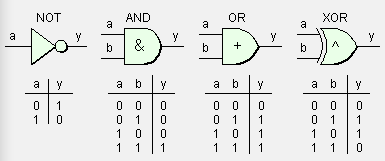


_ http://www.bristolwatch.com/pport/python_examples.html _

## 1.1 AND


## 1.2 OR


## 1.3 XOR ( X ) => Multi lyaer Perceptron 으로 해결(민스키) 
## => 학습이 불가능 => Backpropagation




# 2. 실습

## 2.1 xor

In [1]:
import torch

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# for reproducibility
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [3]:
X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]]).to(device)
Y = torch.FloatTensor([[0], [1], [1], [0]]).to(device)

In [4]:
# nn layers
linear = torch.nn.Linear(2, 1, bias=True)
sigmoid = torch.nn.Sigmoid()

In [5]:
# model
model = torch.nn.Sequential(linear, sigmoid).to(device)

In [6]:
# define cost/loss & optimizer
criterion = torch.nn.BCELoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=1)

In [8]:
for step in range(10001):
    optimizer.zero_grad()
    hypothesis = model(X)

    # cost/loss function
    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()

    if step % 1000 == 0:
        print(step, cost.item())

0 0.6931471824645996
1000 0.6931471824645996
2000 0.6931471824645996
3000 0.6931471824645996
4000 0.6931471824645996
5000 0.6931471824645996
6000 0.6931471824645996
7000 0.6931471824645996
8000 0.6931471824645996
9000 0.6931471824645996
10000 0.6931471824645996


In [12]:
# Accuracy computation
# True if hypothesis>0.5 else False
with torch.no_grad():
    hypothesis = model(X)
    predicted = (hypothesis > 0.5).float()
    accuracy = (predicted == Y).float().mean()
    print('\nHypothesis: ', hypothesis.detach().cpu().numpy(), '\nCorrect: ', predicted.detach().cpu().numpy(), '\nAccuracy: ', accuracy.item() * 100, '%')


Hypothesis:  [[0.5]
 [0.5]
 [0.5]
 [0.5]] 
Correct:  [[0.]
 [0.]
 [0.]
 [0.]] 
Accuracy:  50.0 %


## 2.2 xor_nn

In [13]:
X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]]).to(device)
Y = torch.FloatTensor([[0], [1], [1], [0]]).to(device)

# nn layers
# multi layers
linear1 = torch.nn.Linear(2, 2, bias=True) 
linear2 = torch.nn.Linear(2, 1, bias=True)
sigmoid = torch.nn.Sigmoid()

# model
model = torch.nn.Sequential(linear1, sigmoid, linear2, sigmoid).to(device)


# define cost/loss & optimizer
criterion = torch.nn.BCELoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=1)  # modified learning rate from 0.1 to 1

In [31]:
for step in range(10001):
    optimizer.zero_grad()
    hypothesis = model(X)

    # cost/loss function
    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()

    if step % 1000 == 0:
        print(step, cost.item())

0 0.34716302156448364
1000 0.3471029996871948
2000 0.34705421328544617
3000 0.34701329469680786
4000 0.34697872400283813
5000 0.3469492793083191
6000 0.3469237983226776
7000 0.3469012677669525
8000 0.3468814790248871
9000 0.3468639552593231
10000 0.3468482494354248


In [32]:
# Accuracy computation
# True if hypothesis>0.5 else False
with torch.no_grad():
    hypothesis = model(X)
    predicted = (hypothesis > 0.5).float()
    accuracy = (predicted == Y).float().mean()
    print('\nHypothesis: ', hypothesis.detach().cpu().numpy(), '\nCorrect: ', predicted.detach().cpu().numpy(), '\nAccuracy: ', accuracy.item() * 100, '%')


Hypothesis:  [[2.7531455e-04]
 [4.9987873e-01]
 [9.9970007e-01]
 [5.0014031e-01]] 
Correct:  [[0.]
 [0.]
 [1.]
 [1.]] 
Accuracy:  50.0 %


## 2.3 xor-nn-wide-deep

In [33]:
X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]]).to(device)
Y = torch.FloatTensor([[0], [1], [1], [0]]).to(device)

In [34]:
# nn layers
linear1 = torch.nn.Linear(2, 10, bias=True)
linear2 = torch.nn.Linear(10, 10, bias=True)
linear3 = torch.nn.Linear(10, 10, bias=True)
linear4 = torch.nn.Linear(10, 1, bias=True)
sigmoid = torch.nn.Sigmoid()

In [35]:
# model
model = torch.nn.Sequential(linear1, sigmoid, linear2, sigmoid, linear3, sigmoid, linear4, sigmoid).to(device)

In [36]:
# define cost/loss & optimizer
criterion = torch.nn.BCELoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=1)  # modified learning rate from 0.1 to 1

In [38]:

for step in range(10001):
    optimizer.zero_grad()
    hypothesis = model(X)

    # cost/loss function
    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()

    if step % 1000 == 0:
        print(step, cost.item())

0 0.00011170558718731627
1000 9.523803601041436e-05
2000 8.288382377941161e-05
3000 7.324200123548508e-05
4000 6.562694761669263e-05
5000 5.936805246165022e-05
6000 5.415234045358375e-05
7000 4.975625779479742e-05
8000 4.6045686758589e-05
9000 4.281198198441416e-05
10000 3.998064494226128e-05


In [39]:
# True if hypothesis>0.5 else False
with torch.no_grad():
    hypothesis = model(X)
    predicted = (hypothesis > 0.5).float()
    accuracy = (predicted == Y).float().mean()
    print('\nHypothesis: ', hypothesis.detach().cpu().numpy(), '\nCorrect: ', predicted.detach().cpu().numpy(), '\nAccuracy: ', accuracy.item() * 100, '%')


Hypothesis:  [[3.0086994e-05]
 [9.9996173e-01]
 [9.9995995e-01]
 [5.1474111e-05]] 
Correct:  [[0.]
 [1.]
 [1.]
 [0.]] 
Accuracy:  100.0 %


## Backpropagation

In [25]:
X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]]).to(device)
Y = torch.FloatTensor([[0], [1], [1], [0]]).to(device)

In [30]:
# nn layers
w1 = torch.Tensor(2, 2).to(device)
b1 = torch.Tensor(2).to(device)
w2 = torch.Tensor(2, 1).to(device)
b2 = torch.Tensor(1).to(device)

def sigmoid(x) :
    return 1./ ( 1.0 + torch.exp(-x))

# sigmoid 미분한 뒤 함수
def sigmoid_prime(x) :
    return sigmoid(x) * ( 1- sigmoid(x))

learning_rate = 0.00001

for step in range(10001) :
    # forward
    l1 = torch.add(torch.matmul(X, w1), b1)
    a1 = sigmoid(l1)
    l2 = torch.add(torch.matmul(a1, w2), b2)
    Y_pred = sigmoid(l2)
    
    # binary sigmoid 함수
    cost = -torch.mean(Y * torch.log(Y_pred) + (1 - Y) * torch.log(1 - Y_pred) )
    
    # Back prop (chain rule)
    # Loss derivative
    d_Y_pred = (Y_pred - Y) / (Y_pred * (1.0 - Y_pred) + 1e-7)
    
    # layer 2
    d_l2 = d_Y_pred * sigmoid_prime(l2)
    d_b2 = d_l2
    d_w2 = torch.matmul(torch.transpose(a1, 0, 1), d_b2)
    
    # layer 1
    d_a1 = torch.matmul(d_b2, torch.transpose(w2, 0, 1))
    d_l1 = d_a1 * sigmoid_prime(l1)
    d_b1 = d_l1
    d_w1 = torch.matmul(torch.transpose(X, 0, 1), d_b1)
    
    # weight update
    w1 = w1 - learning_rate * d_w1
    b1 = b1 - learning_rate * torch.mean(d_b1, 0)
    w2 = w2 - learning_rate * d_w2
    b2 = b2 - learning_rate * torch.mean(d_b2, 0)
    
    if step % 1000 == 0 :
        print(step, cost.item())
    

0 0.695397138595581
1000 0.6953632831573486
2000 0.695330023765564
3000 0.6952971816062927
4000 0.6952646374702454
5000 0.6952325701713562
6000 0.6952009797096252
7000 0.6951702237129211
8000 0.6951398849487305
9000 0.6951098442077637
10000 0.695080041885376
